In [6]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import preprocessing
from IPython.display import clear_output

In [3]:
# Fonction de lecture du fichier csv

def read_csv(filename):
    try:
        global data_csv
        data_csv = pd.read_csv(filename, sep=",", engine='python')
        return data_csv
    except Exception as e:
        print(e)

In [4]:
# Lecture du fichier CSV Iris

file = read_csv('Social_Network_Ads.xls')
print(file.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [7]:
# Déclaration de variables

le = preprocessing.LabelEncoder()

In [8]:
# Vérification de présence de valeur null

file.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
# Convertion des valeurs "string" en "int" de la colonne Spicies

var_encoded=le.fit_transform(file["Gender"])

df_var_encoded = pd.DataFrame({'Gender':np.array(var_encoded)})


# Création d'un DataFrame avec les valeurs de Species transformées

fl_encoded = file

# 1st Method

# fl_encoded = fl_encoded.drop(['CAT_STR'], axis=1)

# fl_encoded = fl_encoded.join(df_var_encoded) 

# 2nd Method

data_to_int = pd.DataFrame({'Gender':np.array(var_encoded)})
fl_encoded.update(data_to_int)

fl_encoded.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


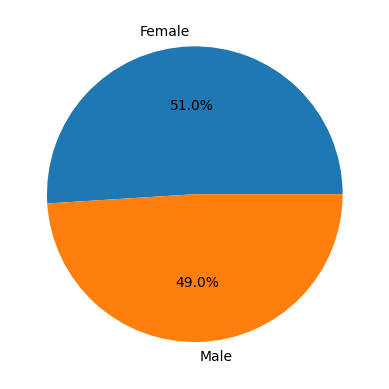

In [9]:
# Affiche la répartition des resultats présents dans le DataFrame par catégorie

ax = file['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title('')
ax.set_ylabel('')
plt.show()

In [10]:
# Affiche la moyenne de salaire estimé par sexe

fl = file.groupby('Gender')['EstimatedSalary'].mean()
clear_output()
print(fl)

Gender
Female    71759.803922
Male      67642.857143
Name: EstimatedSalary, dtype: float64


In [11]:
# Affiche la moyenne d'âge par sexe

fl = file.groupby('Gender')['Age'].mean()
clear_output()
print(fl)

Gender
Female    38.411765
Male      36.867347
Name: Age, dtype: float64


In [14]:
# Affiche la moyenne d'achat par âge

fl = file.groupby('Purchased')['Age'].mean()
clear_output()
print(fl)

Purchased
0    32.793774
1    46.391608
Name: Age, dtype: float64


In [35]:
# Affiche la moyenne d'achat

fl = file['Purchased'].mean()
clear_output()
print((fl*100), str("%"))

35.75 %


In [37]:
# Affiche la moyenne 0:F 1:H

fl = fl_encoded.groupby('Purchased')['Gender'].mean()
clear_output()
print(fl)


Purchased
0    0.505837
1    0.461538
Name: Gender, dtype: float64


In [22]:
# Affiche le tableau des mesures max et min

fl_min = file['Age'].min()
fl_max = file['Age'].max()
clear_output()
print("Age Min",fl_min,"\n")
print("Age Max",fl_max)

Age Min 18 

Age Max 60


In [38]:
# Affiche le tableau des mesures max et min

fl_min = file['EstimatedSalary'].min()
fl_max = file['EstimatedSalary'].max()
clear_output()
print("EstimatedSalary Min",fl_min,"\n")
print("EstimatedSalary Max",fl_max)

EstimatedSalary Min 15000 

EstimatedSalary Max 150000


In [48]:
# Séparation valeurs et resultats

feature_columns = ['Gender','Age','EstimatedSalary']
X = fl_encoded[feature_columns].values
y = fl_encoded['Purchased'].values

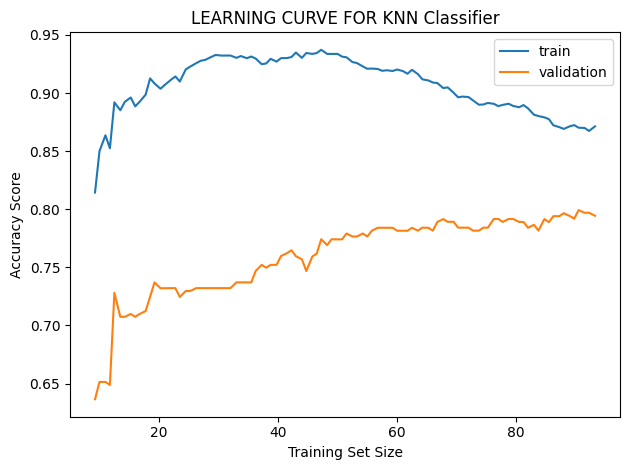

In [49]:
# Affiche la meilleur répartition pour la découpe du jeu de données

model=KNeighborsClassifier()

N, train_score, val_score = learning_curve(model, X, y, train_sizes = np.linspace(0.1, 1, 100),  cv=15, scoring='accuracy')
plt.plot(N/X.shape[0]*100, train_score.mean(axis=1), label='train')
plt.plot(N/X.shape[0]*100, val_score.mean(axis=1), label='validation')
# clear_output()
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [50]:
# Séparation du jeu de données en deux

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [51]:
stand= StandardScaler()
fit_train= stand.fit_transform(X_train)
transfor_test=stand.transform(X_test)

In [52]:
# Features Selection - Varaince Threshold

selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [53]:
# Calcule du meilleur nombre de voisins

model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=5)

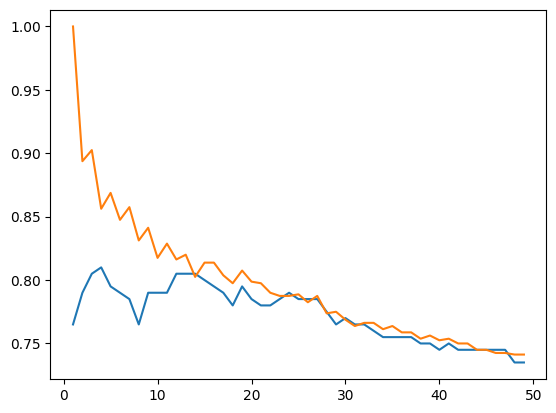

In [54]:
# Affichage du graphique des scores selon le nombre de voisin

plt.plot(k, val_score.mean(axis=1))
plt.plot(k, train_score.mean(axis=1))
clear_output()

In [55]:
# Détermine les meilleurs paramètres pour le nombre de voisin et la méthode utilisée

param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
clear_output()

In [56]:
# Affiche le meilleur score posible

grid.best_score_

0.8099999999999999

In [57]:
# Affiche les meilleurs paramètres

grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 4}

In [58]:
# Test les paramètres sur le jeu de données test

model = grid.best_estimator_
model.score(X_test, y_test)

0.79

In [59]:
# Affiche la matrice de confusion

y_pred = model.predict(X_test)
confus_matrix = metrics.confusion_matrix(y_test, y_pred)
confus_matrix

NameError: name 'metrics' is not defined

In [ ]:
# Test de prédiction standardisé

model.fit(fit_train, y_train)
y_pred = model.predict(transfor_test)
print(y_pred)

In [ ]:
# Sauvegarde du modèle avec Pickle

d={}
d["model"]=model
d["stand"]=stand
d["le"]=le
f = open('fl.pkl', 'wb')
pickle.dump(d, f)
f.close()      